# Importovanie knižníc

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
import sklearn
import sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler




# Popis údajov

Zdroj údajov: [Audi Použité Autá - Zoznam](https://www.kaggle.com/datasets/mysarahmadbhat/audi-used-car-listings)

| Atribút         | Popis                                                                                        |
|:----------------|:---------------------------------------------------------------------------------------------|
| model           | Model Audi auta (napr. A3, A4, Q5).                                                          |
| year            | Rok výroby auta.                                                                             |
| price           | Cena auta uvedená v eurách                                                             |
| transmission    | Typ prevodovky auta (napr. Manuál, Automat, Semi-Auto).                                      |
| mileage         | Celkový počet míľ, ktoré auto najazdilo                 |
| fuelType        | Typ paliva, ktoré auto používa (napr. Benzín, Diesel).                               |
| tax             | Ročná daň vzťahujúca sa na autoúdajov.                                      |
| mpg             | Spotreba paliva auta.                                     |
| engineSize      | Objem motora auta v litroch.                                                                 |




## Load the data

In [7]:
df=pd.read_csv('/content/audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# Dátové typy a zistenie NaN hodnôt

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [10]:
df.shape

(10668, 9)

In [11]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

# Check the numerical features

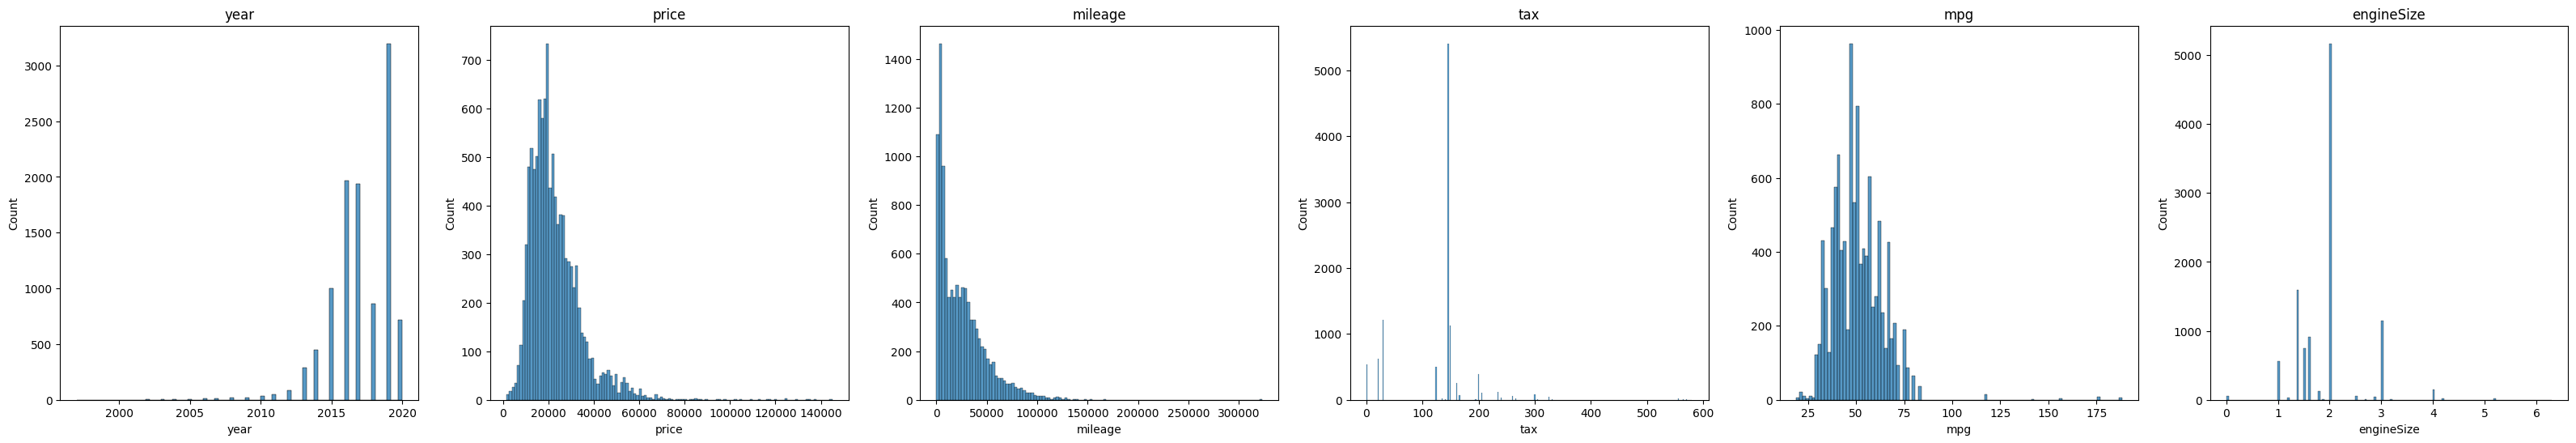

In [12]:
df_only_numeric = df.select_dtypes(np.number)

n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

Najväčší dopyt po autách značky Audi stúpol medzi rokmi 2010 a 2015 a následne sa udržiaval na rovnakej hodnote a potom klesol a zase stúpol.
Najčastejšie kupované autá mali cenu okolo 10 000 eur až do 35 000 eur približne.
Najväčší dopyt bol po úplne nových autách a autách s objemom motora 2 Litre a spotrebou 5.6 litrou.

In [13]:
df.nlargest(20, 'price')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2
1646,R8,2019,129000,Semi-Auto,4000,Petrol,145,21.4,5.2
3359,R8,2019,125000,Automatic,100,Petrol,145,24.1,5.2
4925,R8,2019,125000,Semi-Auto,500,Petrol,145,21.4,5.2
10468,R8,2019,125000,Automatic,13663,Petrol,150,21.4,5.2
7445,R8,2019,119995,Semi-Auto,7800,Petrol,145,21.4,5.2


# Počet modelov (Countplot)

In [15]:
df["model"].value_counts()

,count
model,
A3,1929
Q3,1417
A4,1381
A1,1347
A5,882
Q5,877
Q2,822
A6,748
Q7,397


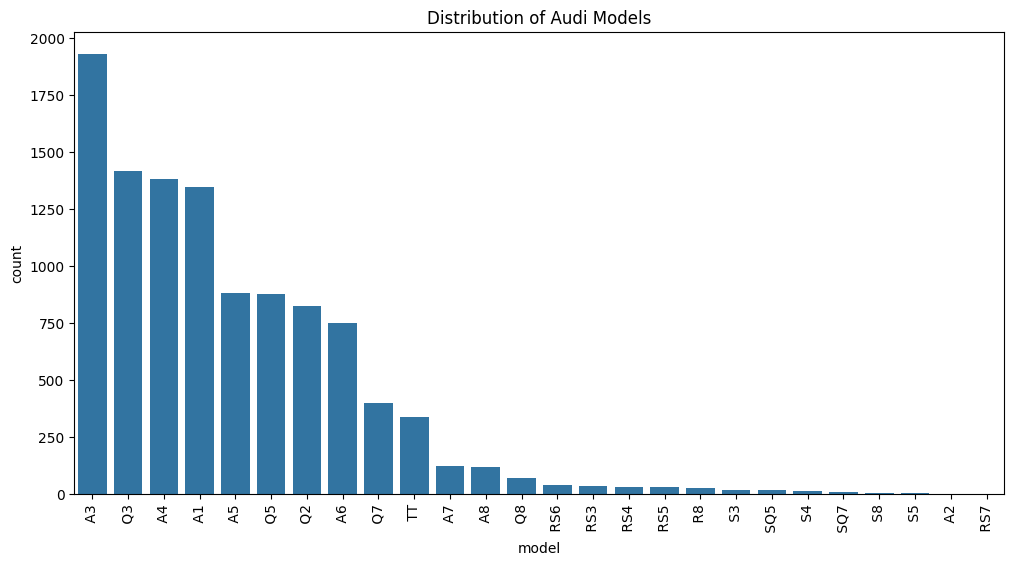

In [16]:
plt.figure(figsize=(12, 6))

plt.title("Distribution of Audi Models")
sns.countplot(data=df, x='model', order=df['model'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Počet áut v závislosti od paliva (Countplot)

In [17]:
df["fuelType"].value_counts()

,count
fuelType,
Diesel,5577
Petrol,5063
Hybrid,28


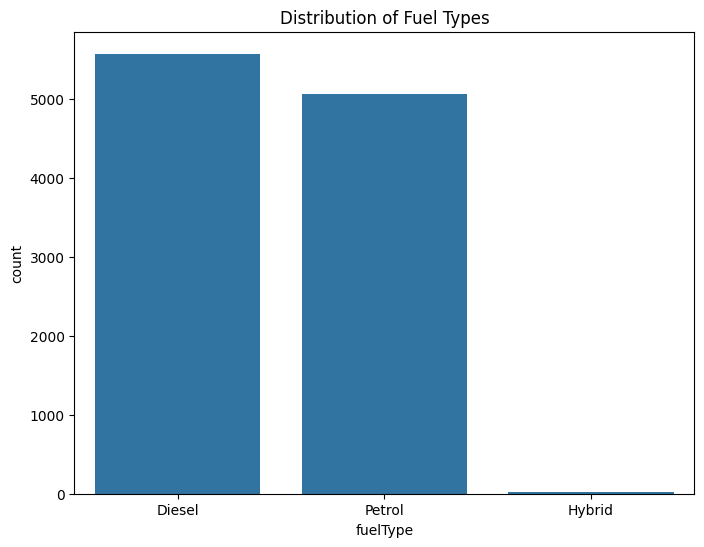

In [18]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Fuel Types")
sns.countplot(data=df, x='fuelType', order=df['fuelType'].value_counts().index)
plt.show()

# Počet áut v závislosti od prevodovky (Countplot)

In [19]:
df["transmission"].value_counts()

,count
transmission,
Manual,4369
Semi-Auto,3591
Automatic,2708


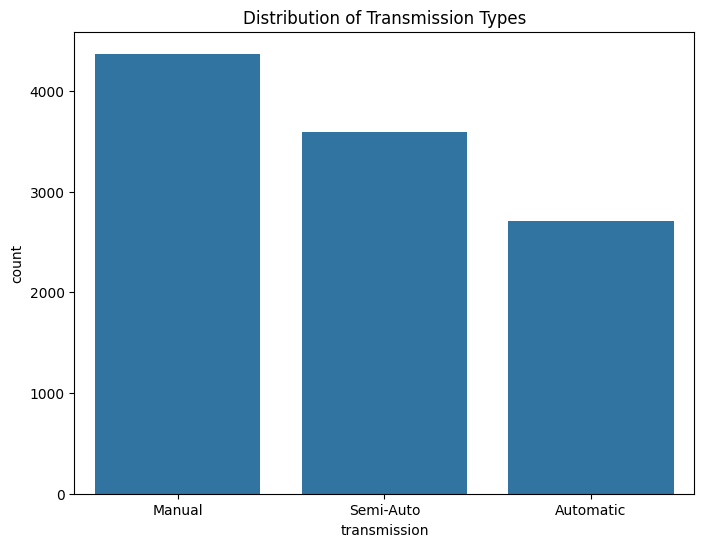

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Transmission Types")
sns.countplot(data=df, x='transmission', order=df['transmission'].value_counts().index)
plt.show()




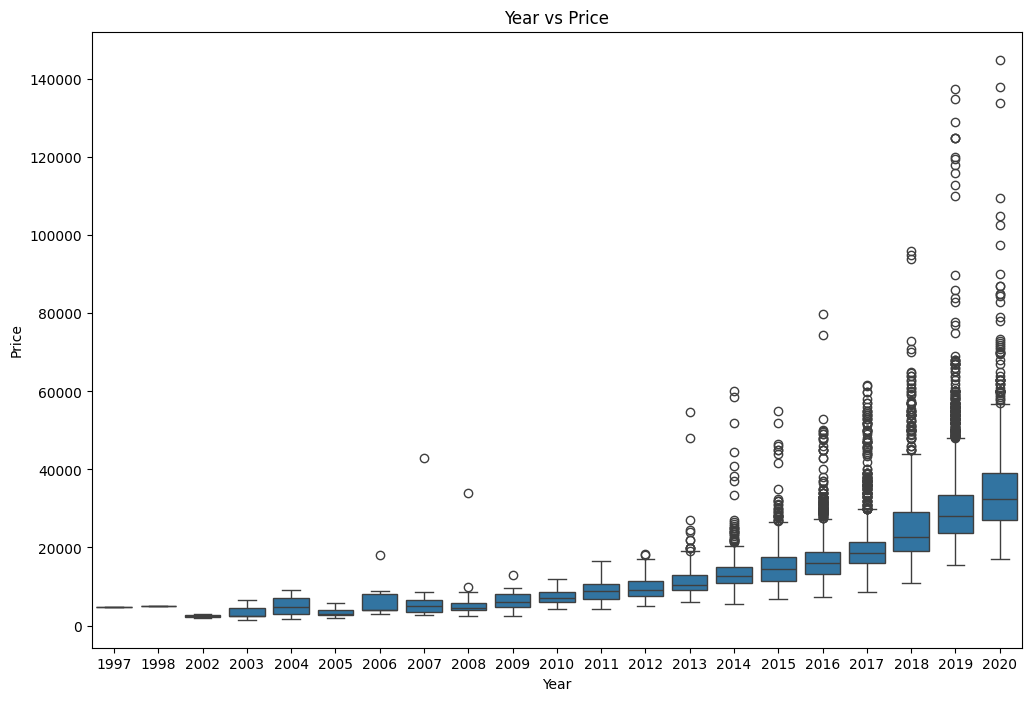

In [21]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='year', y='price', data=df)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

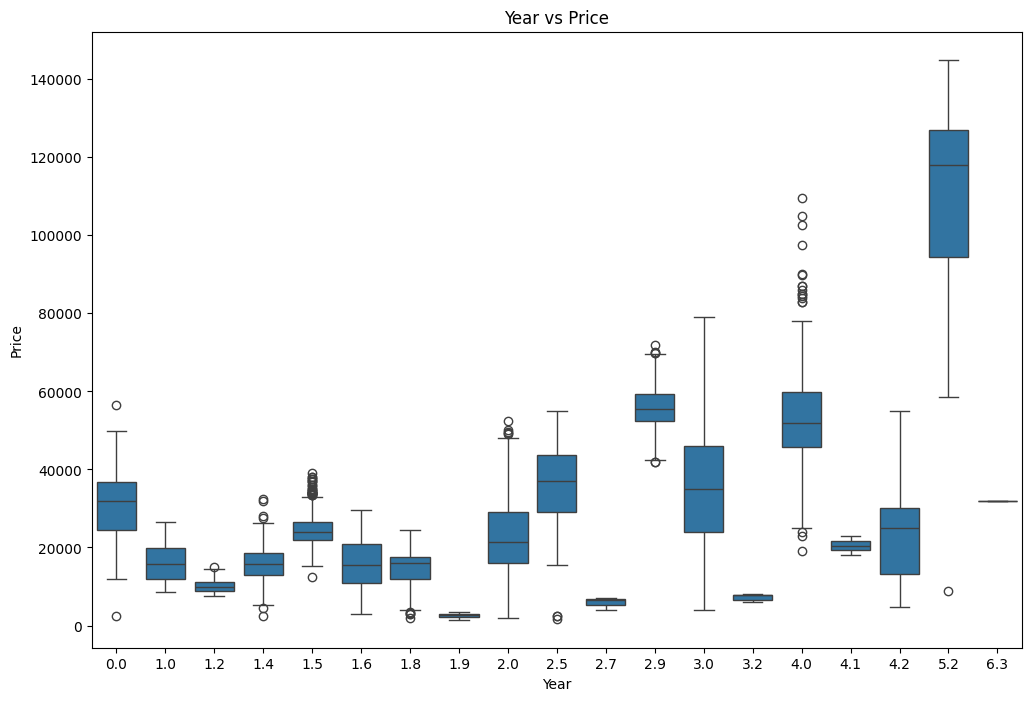

In [22]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='engineSize', y='price', data=df)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [23]:
df[['model', 'mileage', 'year', 'mpg','price']].sort_values(by='year', ascending=False).head(10)

,model,mileage,year,mpg,price
7132,A5,5000,2020,50.4,29950
3298,Q5,5000,2020,32.5,62000
9650,A1,1406,2020,44.1,28950
4740,RS4,6000,2020,29.1,71990
7892,Q3,1500,2020,31.4,32000
3304,A7,1200,2020,38.2,38990
6707,A1,2500,2020,48.7,18500
9618,Q3,24,2020,39.8,33990
4722,Q7,6000,2020,33.2,59990
3310,A4,3000,2020,39.2,32000


In [24]:
df[['model', 'mileage', 'year', 'mpg','price']].sort_values(by='price', ascending=False).head(10)

,model,mileage,year,mpg,price
4783,R8,2000,2020,21.1,145000
2255,R8,70,2020,21.1,137995
4179,R8,10,2019,21.4,137500
3367,R8,1000,2019,32.8,135000
5459,R8,333,2020,21.4,133900
1646,R8,4000,2019,21.4,129000
10468,R8,13663,2019,21.4,125000
4925,R8,500,2019,21.4,125000
3359,R8,100,2019,24.1,125000
7445,R8,7800,2019,21.4,119995


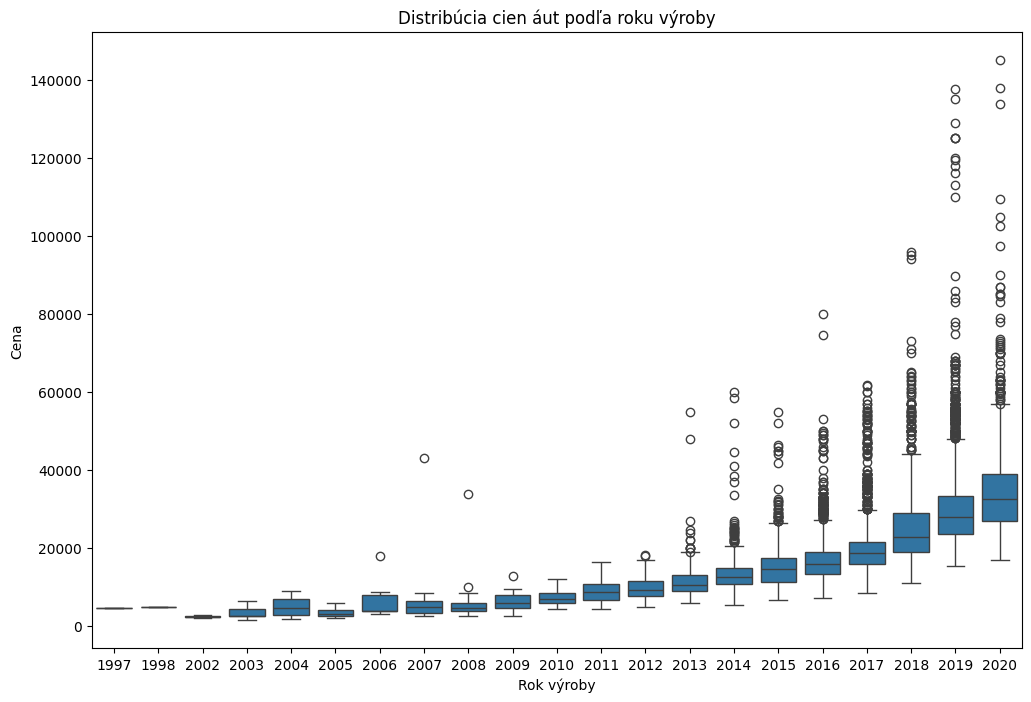

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='year', y='price')
plt.title('Distribúcia cien áut podľa roku výroby')
plt.xlabel('Rok výroby')
plt.ylabel('Cena')
plt.show()


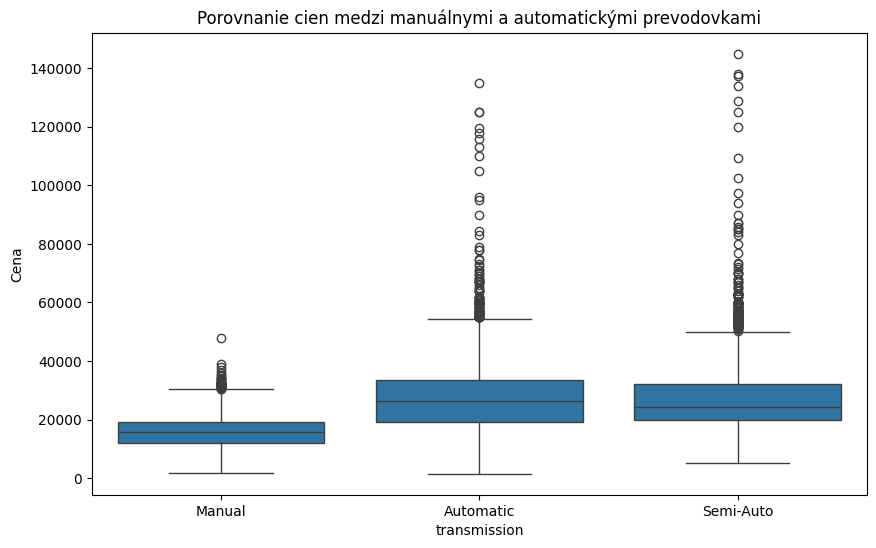

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Porovnanie cien medzi manuálnymi a automatickými prevodovkami')
plt.ylabel('Cena')
plt.show()


# Convert non-numeric to numeric

In [33]:
dfCopy = df.copy()

ordinal_encoder = OrdinalEncoder()
dfCopy['model'] = ordinal_encoder.fit_transform(dfCopy[['model']])

OH_encoder = OneHotEncoder(sparse_output=False)
oh_cols = pd.DataFrame(OH_encoder.fit_transform(dfCopy[['transmission', 'fuelType']]))
oh_cols.columns = OH_encoder.get_feature_names_out(['transmission', 'fuelType'])

dfCopy = dfCopy.drop(['transmission', 'fuelType'], axis=1)
dfCopy = pd.concat([dfCopy, oh_cols], axis=1)

dfCopy.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,0.0,2017,12500,15735,150,55.4,1.4,0.0,1.0,0.0,0.0,0.0,1.0
1,5.0,2016,16500,36203,20,64.2,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2016,11000,29946,30,55.4,1.4,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,2017,16800,25952,145,67.3,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,2019,17300,1998,145,49.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Min Max preprocessing

In [34]:
numeric_columns = dfCopy.select_dtypes(include=[np.number]).columns
df_numeric = dfCopy[numeric_columns]

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

dfCopy[numeric_columns] = df_minmax_scaled

print(dfCopy.head())

   model      year     price   mileage       tax       mpg  engineSize  \
0   0.00  0.869565  0.076719  0.048712  0.258621  0.215466    0.222222   
1   0.20  0.826087  0.104592  0.112081  0.034483  0.267414    0.317460   
2   0.00  0.826087  0.066267  0.092709  0.051724  0.215466    0.222222   
3   0.12  0.869565  0.106682  0.080344  0.250000  0.285714    0.317460   
4   0.08  0.956522  0.110167  0.006183  0.250000  0.181228    0.158730   

   transmission_Automatic  transmission_Manual  transmission_Semi-Auto  \
0                     0.0                  1.0                     0.0   
1                     1.0                  0.0                     0.0   
2                     0.0                  1.0                     0.0   
3                     1.0                  0.0                     0.0   
4                     0.0                  1.0                     0.0   

   fuelType_Diesel  fuelType_Hybrid  fuelType_Petrol  
0              0.0              0.0              1.0  


# Heatmap

<Axes: >

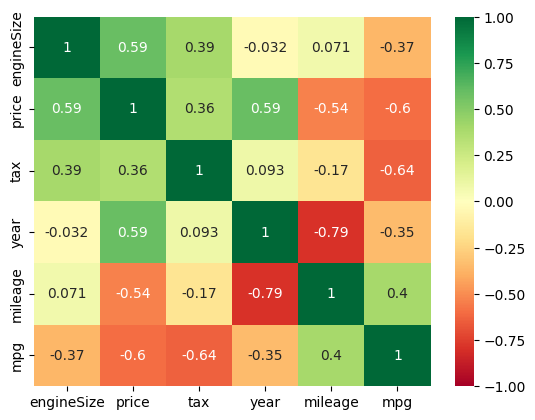

In [35]:
selected_columns=['engineSize','price','tax','year','mileage','mpg']
corr_mat=df[selected_columns].corr()
sns.heatmap(corr_mat,annot=True, cmap='RdYlGn', vmin=-1)

# KMeans Clustering

In [36]:
X=dfCopy.values
clustering_scores = []
for k in range(2, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=13)
    kmeans.fit(X)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, kmeans.labels_)
    })

df_clustering_scores=pd.DataFrame.from_dict(clustering_scores,orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')



<Axes: xlabel='k', ylabel='silhouette'>

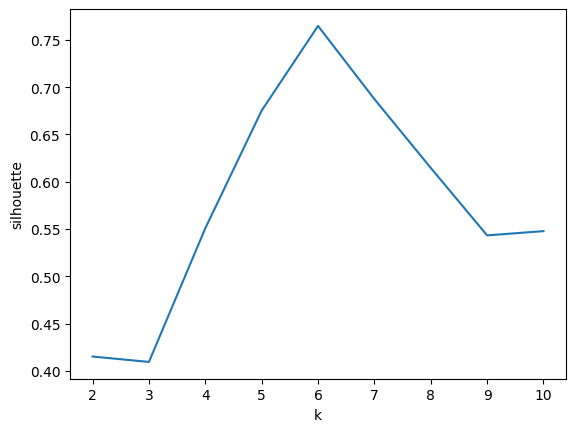

In [37]:
sns.lineplot(data=df_clustering_scores, y='silhouette', x='k')

In [38]:
clustering=sklearn.cluster.KMeans(n_clusters=5, random_state=13)
clustering.fit(X)

KMeans(n_clusters=5, random_state=13)

In [39]:
pd.Series(clustering.labels_).value_counts()

,count
4,2708
2,2250
0,2119
3,1808
1,1783


In [40]:
dfCopy['cluster_id'] = clustering.labels_
dfCopy.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,cluster_id
0,0.00,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
1,0.20,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
2,0.00,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
3,0.12,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
4,0.08,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,2


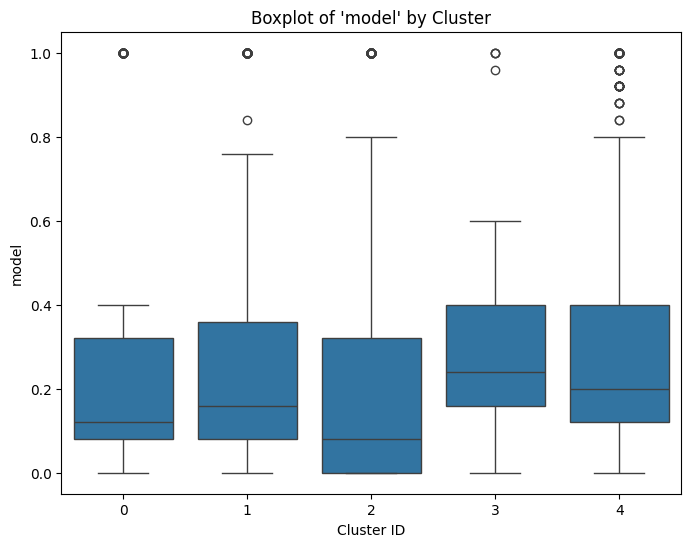

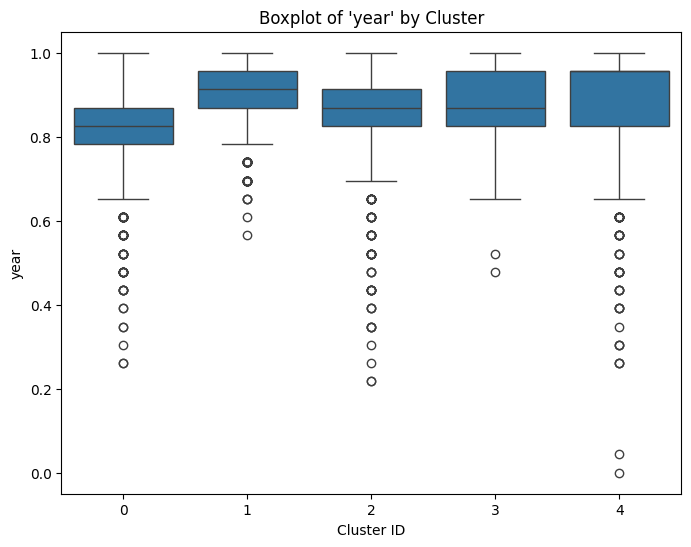

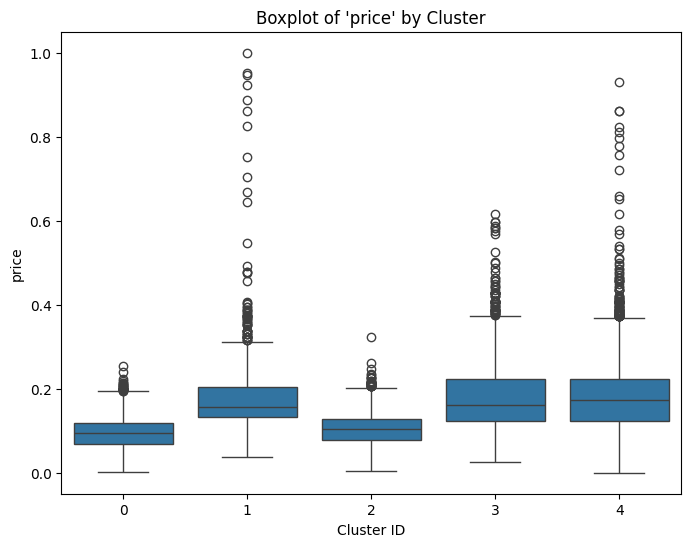

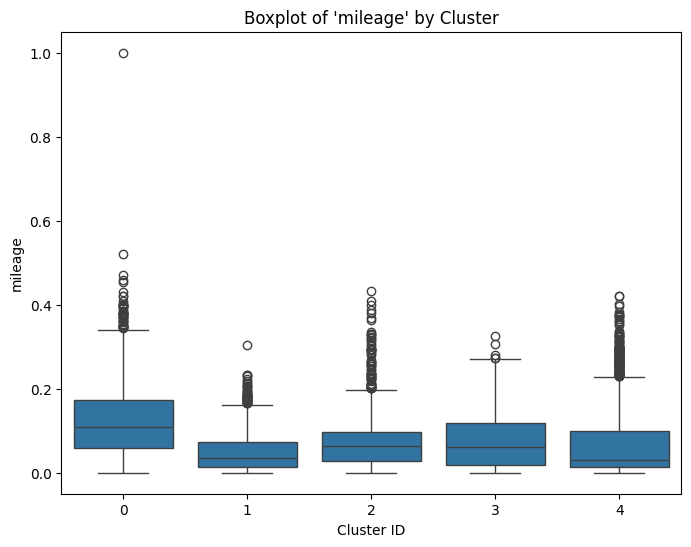

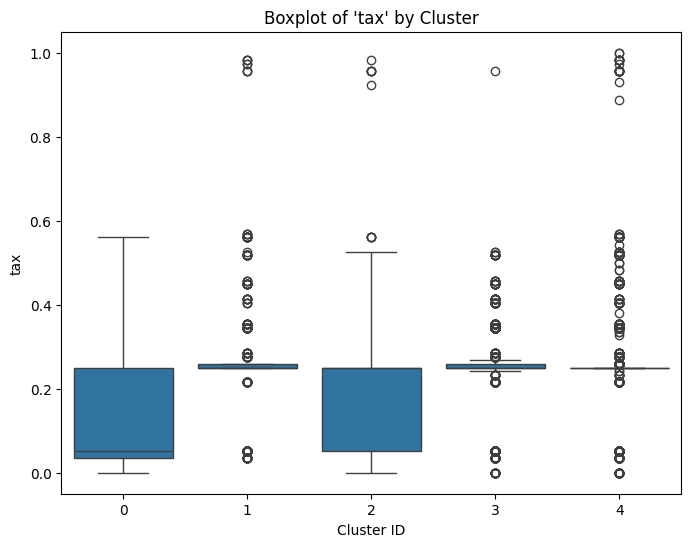

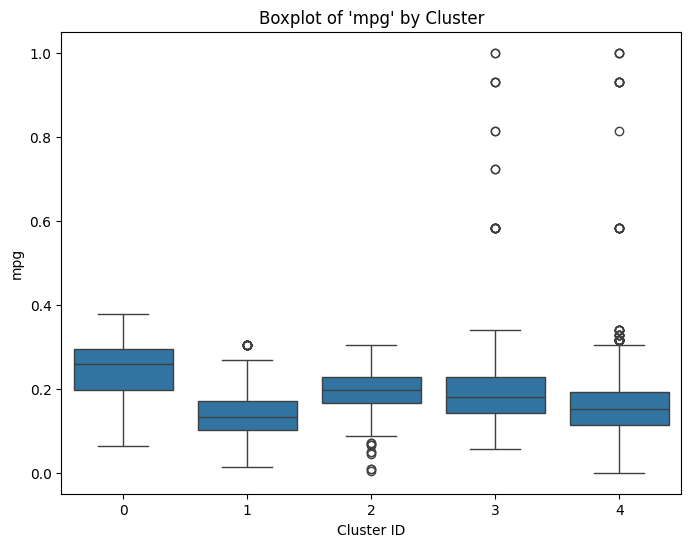

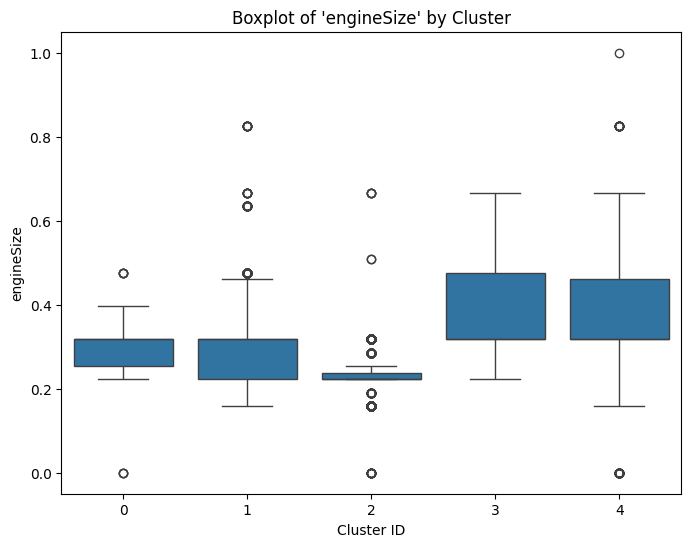

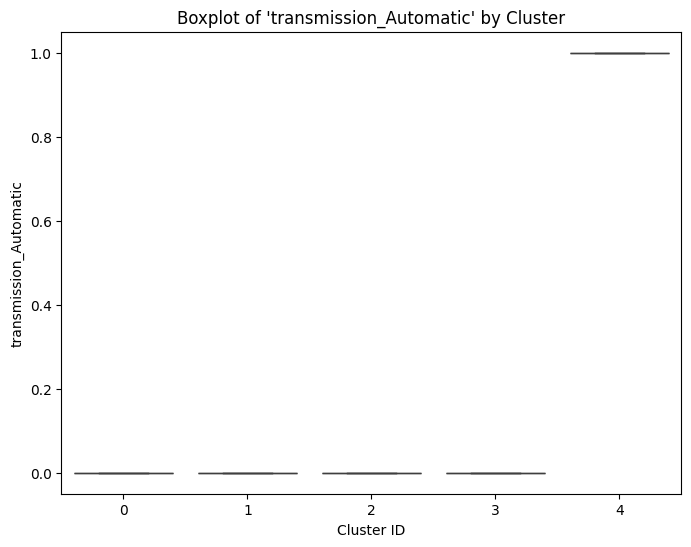

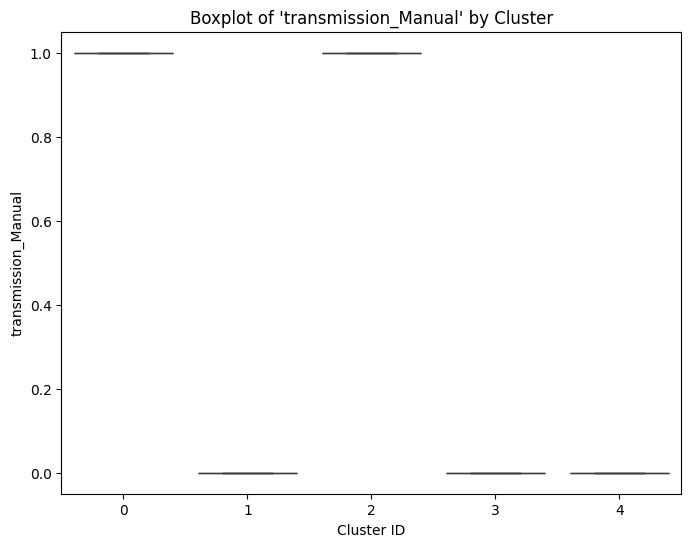

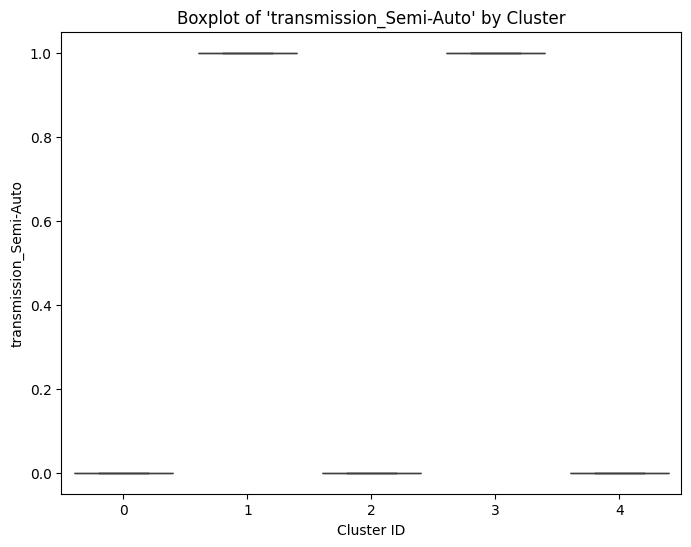

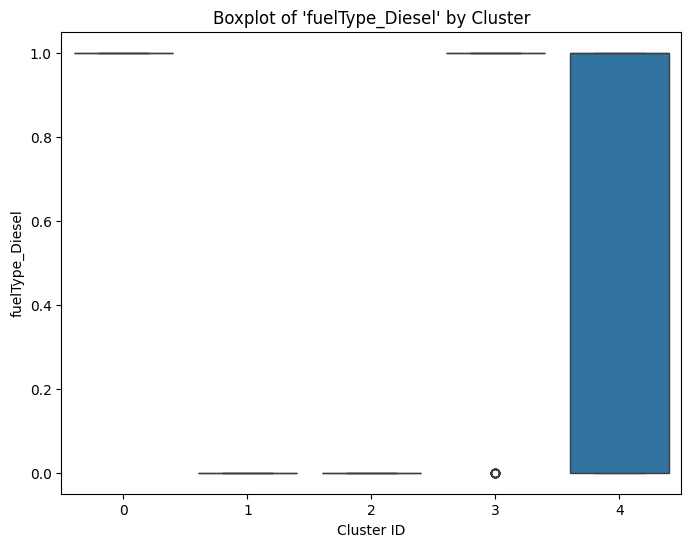

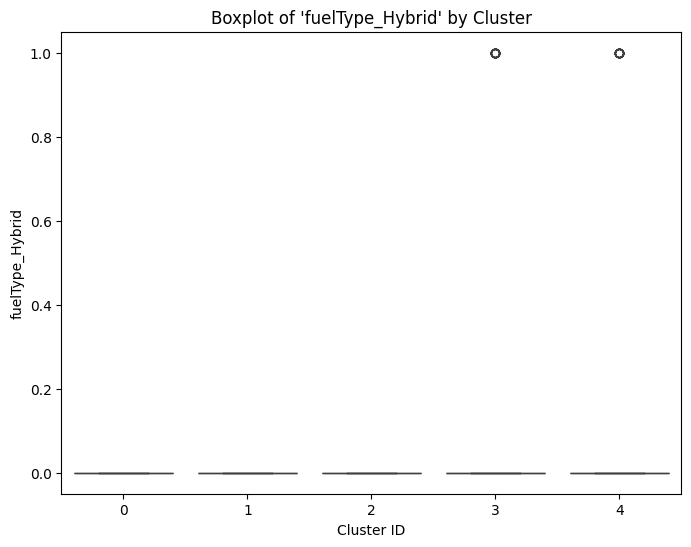

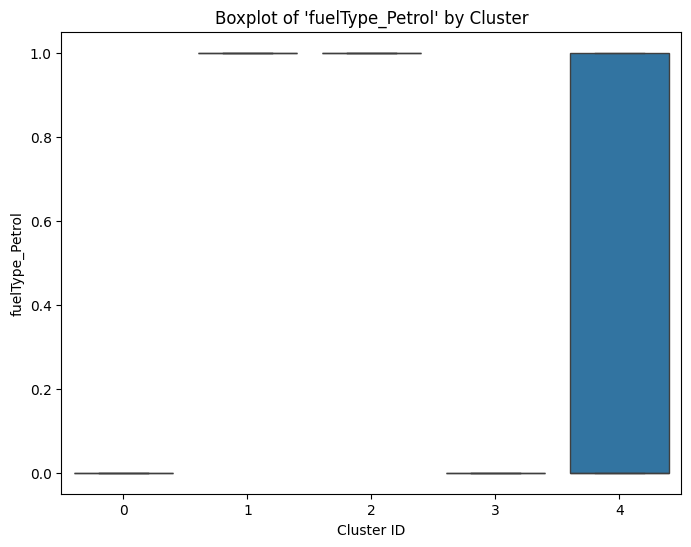

In [41]:
for column in dfCopy.select_dtypes(include=[np.number]).columns:
    if column != 'cluster_id':
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=dfCopy, x='cluster_id', y=column)
        plt.title(f"Boxplot of '{column}' by Cluster")
        plt.xlabel("Cluster ID")
        plt.ylabel(column)
        plt.show()


# Agglomerative Clustering

In [ ]:
X = dfCopy.values

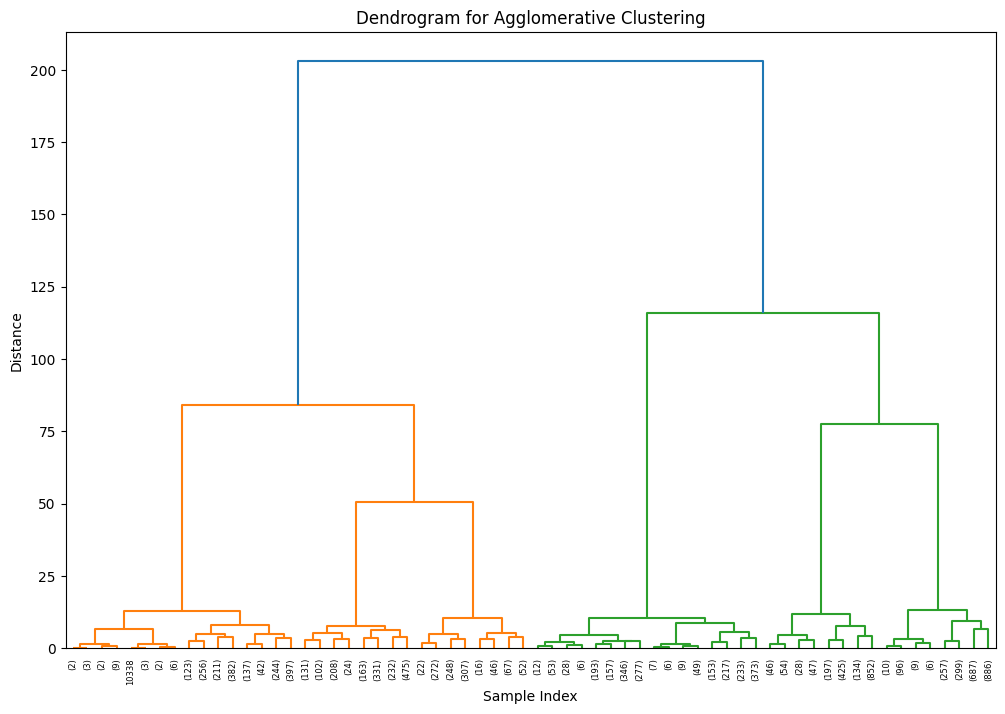

In [ ]:
linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
n_clusters = 3
agglo_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agglo_clustering.fit_predict(X)

dfCopy['agglo_cluster_id'] = cluster_labels


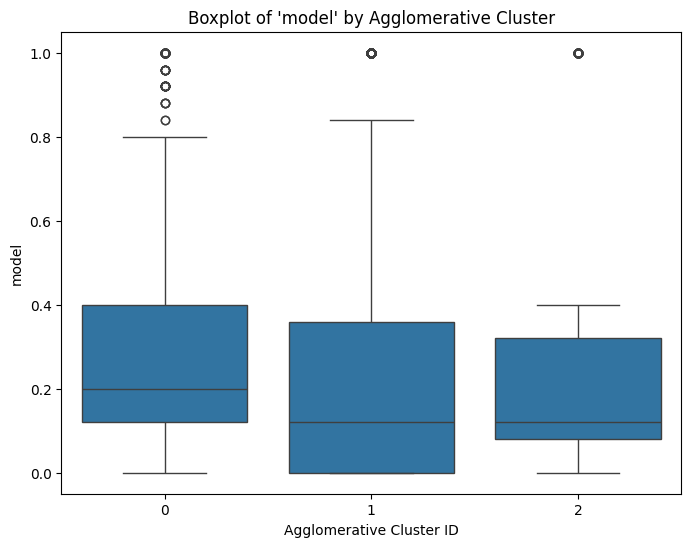

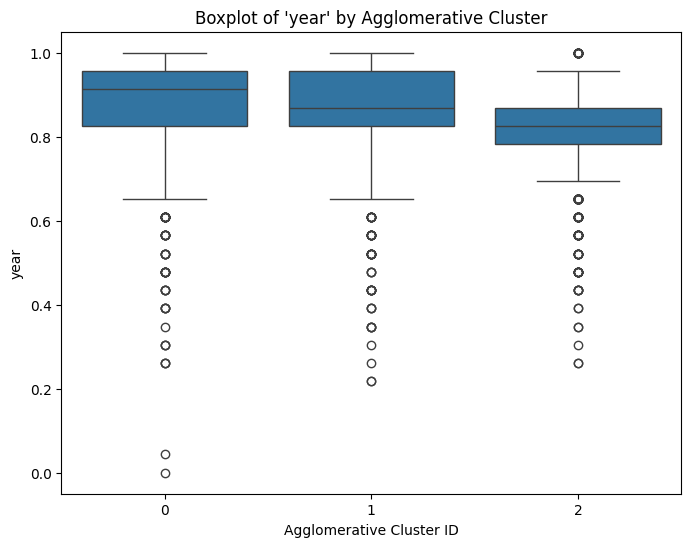

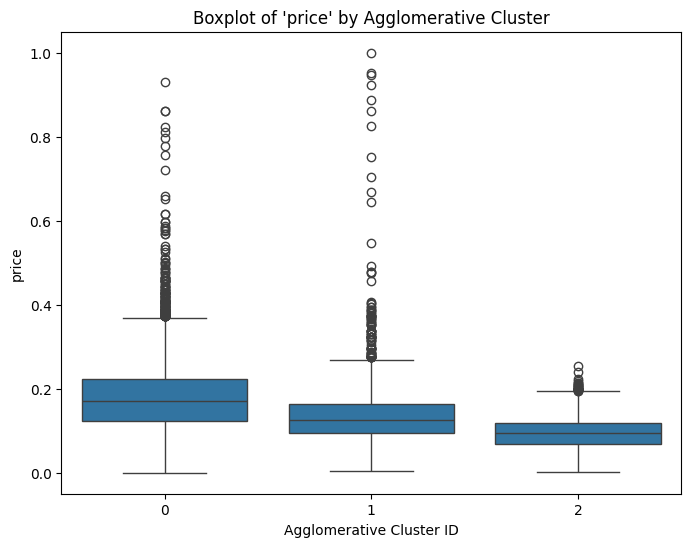

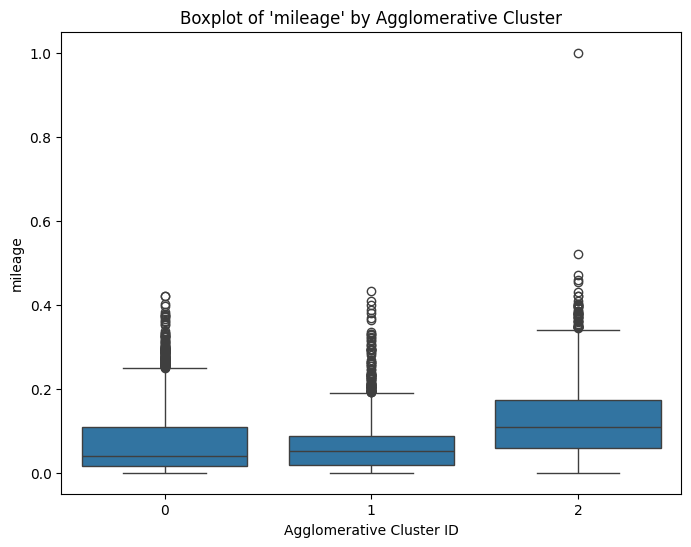

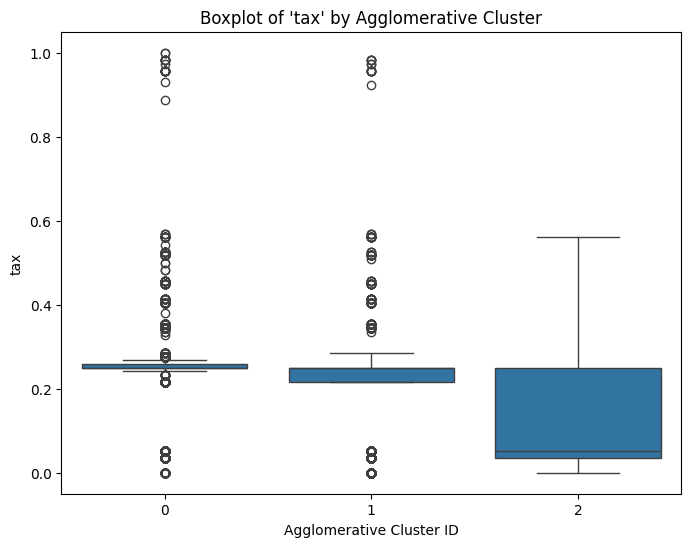

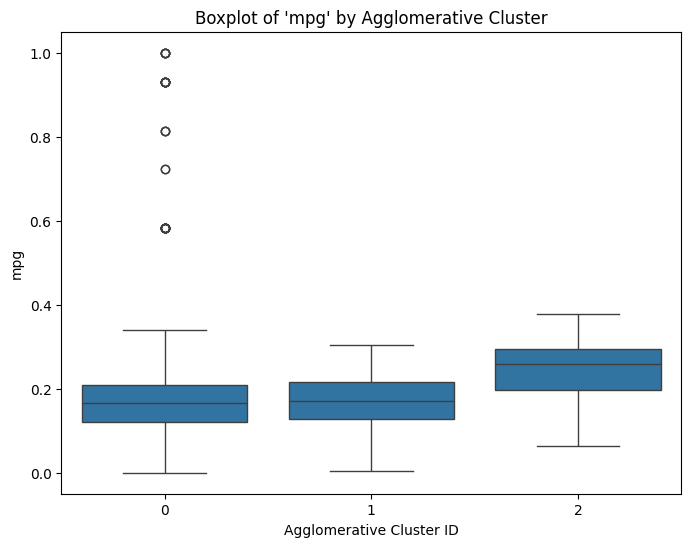

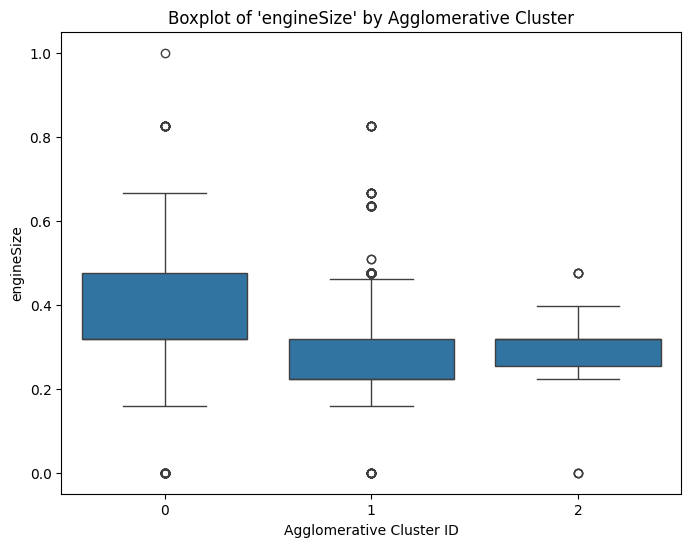

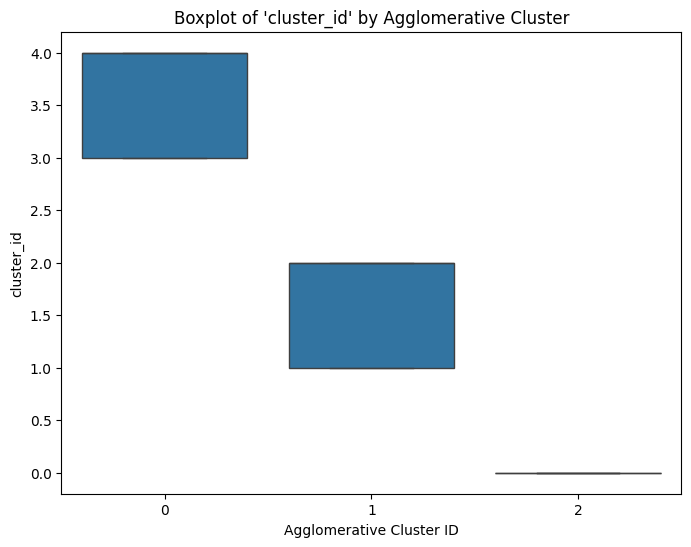

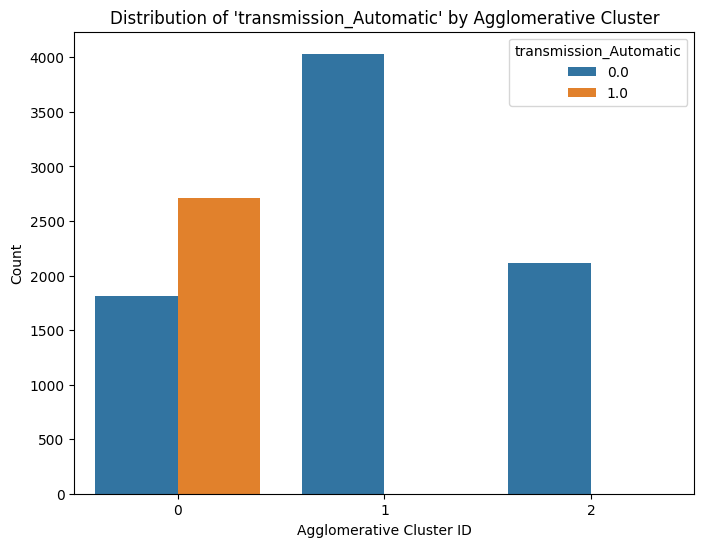

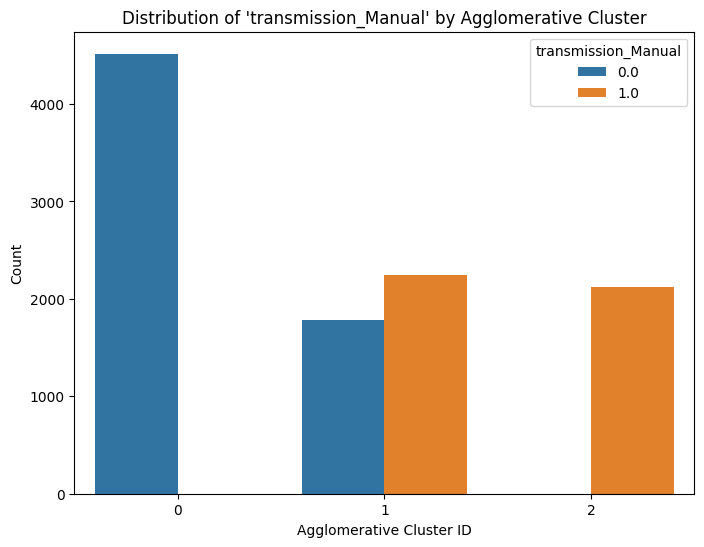

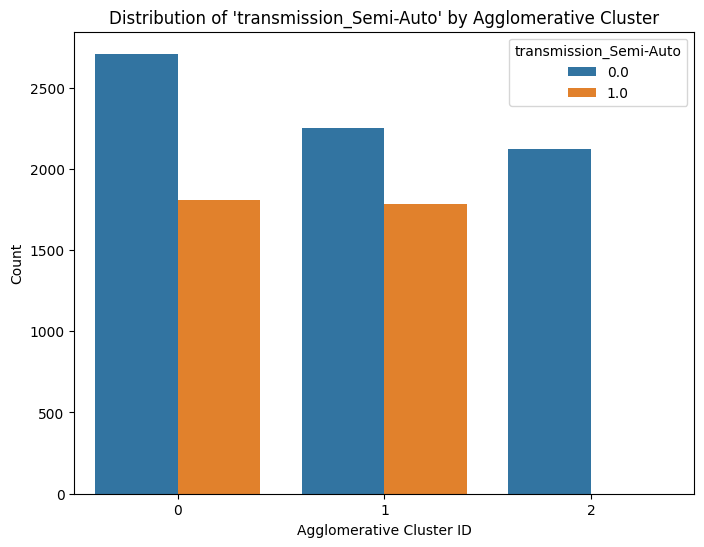

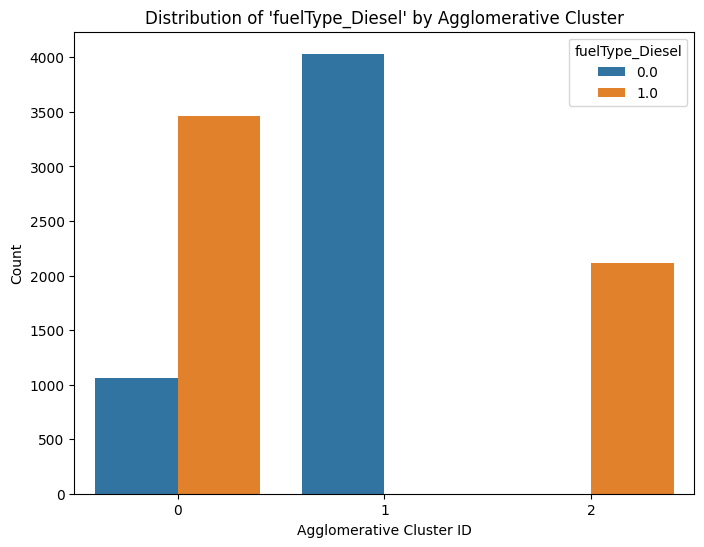

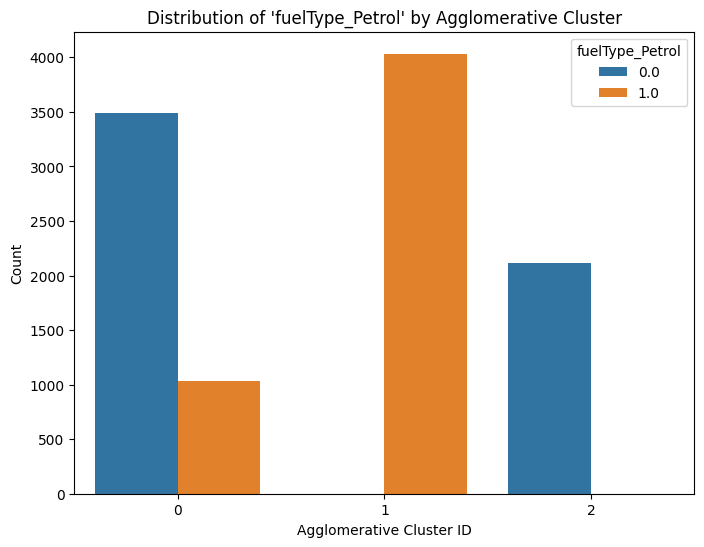

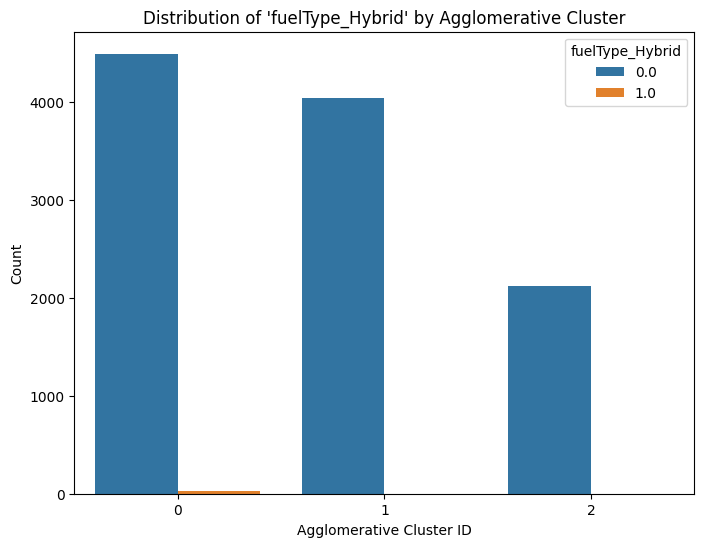

In [ ]:
binary_columns = ['transmission_Automatic', 'transmission_Manual','transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Petrol','fuelType_Hybrid']

for column in dfCopy.select_dtypes(include=[np.number]).columns:
    if column != 'agglo_cluster_id' and column not in binary_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=dfCopy, x='agglo_cluster_id', y=column)
        plt.title(f"Boxplot of '{column}' by Agglomerative Cluster")
        plt.xlabel("Agglomerative Cluster ID")
        plt.ylabel(column)
        plt.show()

for binary_column in binary_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dfCopy, x='agglo_cluster_id', hue=binary_column)
    plt.title(f"Distribution of '{binary_column}' by Agglomerative Cluster")
    plt.xlabel("Agglomerative Cluster ID")
    plt.ylabel("Count")
    plt.legend(title=binary_column)
    plt.show()


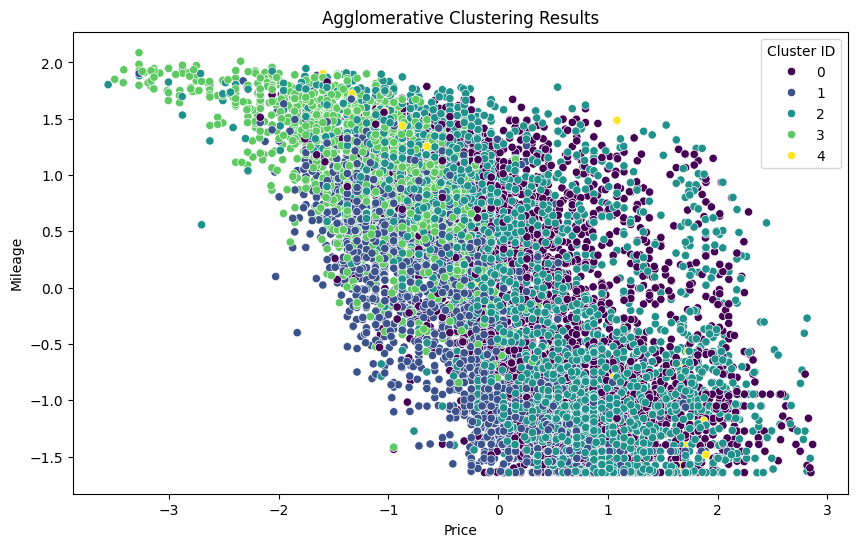

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfCopy['price'], y=dfCopy['mileage'], hue=dfCopy['agglo_cluster_id'], palette='viridis')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.legend(title="Cluster ID")
plt.show()
